In [21]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
files = os.listdir('./data/')
#print files
faces_path = []
labels = []
for f in files:
    try:
        ims = os.listdir('./data/' + f)
        #print f, ims
        for px in ims:
            faces_path.append('./data/' + f + '/' + px)
            labels.append(f)
    except:
        continue

print '\n', labels
print '\n', faces_path


['Barack Obama', 'Barack Obama', 'Barack Obama', 'Barack Obama', 'Barack Obama', 'Barack Obama', 'Barack Obama', 'David Beckham', 'David Beckham', 'David Beckham', 'David Beckham', 'David Beckham', 'David Beckham', 'David Beckham', 'Chris Martin', 'Chris Martin', 'Chris Martin', 'Chris Martin', 'Chris Martin', 'Chris Martin', 'Chris Martin']

['./data/Barack Obama/Obama-6.jpg', './data/Barack Obama/Obama-3.jpg', './data/Barack Obama/Obama-2.jpg', './data/Barack Obama/Obama-5.jpg', './data/Barack Obama/Obama-7.jpg', './data/Barack Obama/Obama-4.jpg', './data/Barack Obama/Obama-1.jpg', './data/David Beckham/Beckham-7.jpg', './data/David Beckham/Beckham-2.jpg', './data/David Beckham/Beckham-6.jpg', './data/David Beckham/Beckham-3.jpg', './data/David Beckham/Beckham-5.jpg', './data/David Beckham/Beckham-4.jpg', './data/David Beckham/Beckham-1.jpg', './data/Chris Martin/Martin-3.jpg', './data/Chris Martin/Martin-1.jpg', './data/Chris Martin/Martin-4.jpg', './data/Chris Martin/Martin-6.jpg'

In [23]:
imgs = []
for fx in faces_path:
    im = cv2.imread(fx)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    imgs.append(im)
print len(imgs)

21


In [24]:
'''
This cropping method assumes that the face lies in similar (VERY SIMILAR) pixel-coordinates in all 5 photos.
Facial expressions can obviously vary, but if in one photo, the face lies between
pixels 100-600 on y-axis and 600-1000 on x-axis, then it should be around that in every photo.
This has been done to circumvent the effort of cropping the face from each photo manually.

Edit to this cell can be skipped if the image provided already has been cropped.
'''

cropping_data = {}
cropping_data['Name'] = {
    'y_begin' : 50,
    'y_end' : 300,
    'x_begin' : 150,
    'x_end' : 400
}

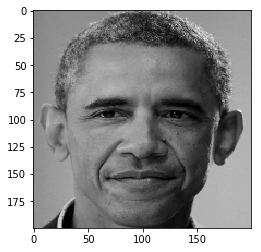

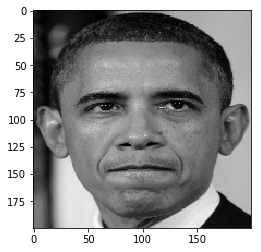

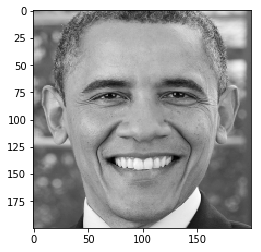

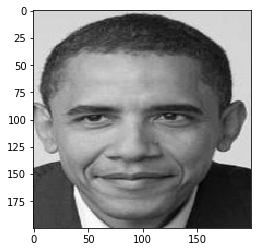

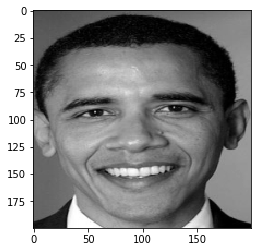

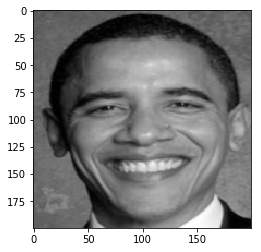

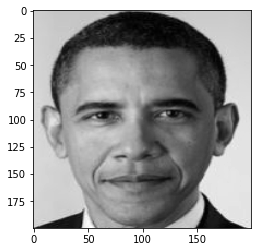

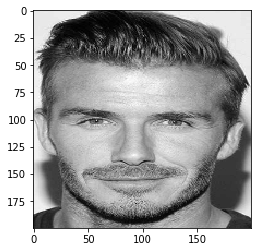

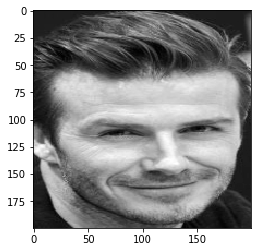

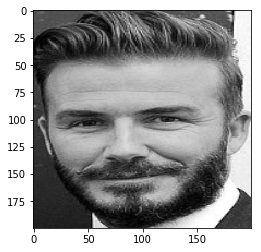

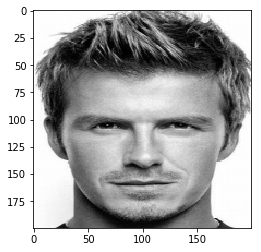

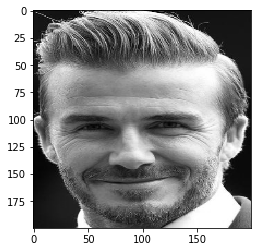

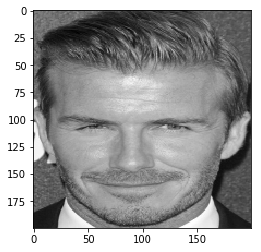

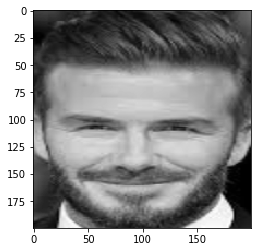

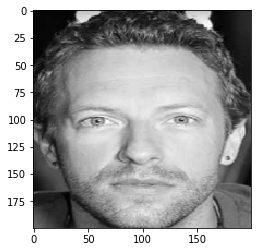

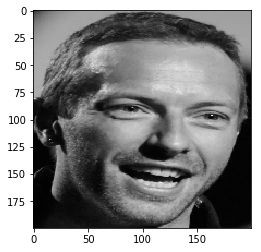

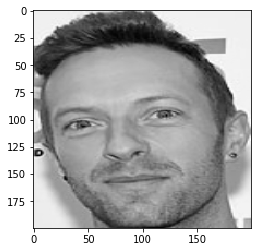

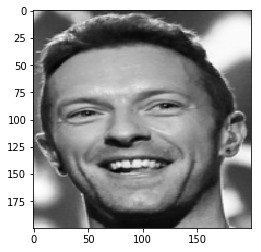

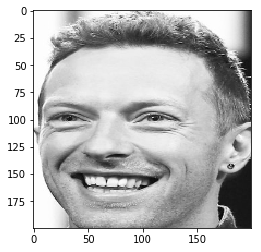

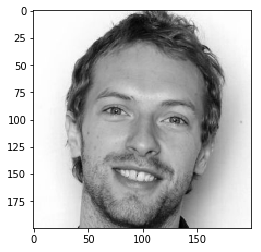

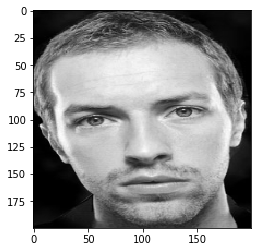

In [25]:
all_faces = []

for ix in range(len(imgs)):
    plt.figure(ix)
    name = labels[ix]
    if name in cropping_data.keys():
        im = imgs[ix][cropping_data[name]['y_begin']:cropping_data[name]['y_end'],cropping_data[name]['x_begin']:cropping_data[name]['x_end'],:]    #Cropping images for faces as per dimensions provided
    else:
        im = imgs[ix][:,:,:]         #If full face has already been provided
    img = cv2.resize(im, (200,200))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    plt.imshow(img, cmap='gray')
    all_faces.append(img)
    
plt.show()

In [26]:
lab = np.asarray(labels)
print lab.shape

np.save('./data/face_labels', lab)
np.save('./data/face_data', all_faces)


(21,)
